# **Email Spam Detection**

# **1. Introduction**

This Kaggle notebook presents a step-by-step guide to building an efficient Email spam classification model using the Email Spam Collection dataset. By the end of this notebook, you'll have a powerful tool to help you filter out unwanted emails.

# **2. Problem Statement**

The primary goal of this notebook is to develop a predictive model that accurately classifies incoming Email messages as either ham or spam. We will use the Email Spam Collection dataset, which consists of 193K EMail messages tagged with their respective labels.

# **3. Data Checks to Perofrm**

## **3.1 Import Necessary Libraries**

In [1]:
import numpy as np      
import pandas as pd       
import matplotlib.pyplot as plt 
%matplotlib inline


from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords


## **3.2 Load the Data**

In [2]:
df = pd.read_csv("../spam_Emails_data.csv")

In [ ]:
df.head()

,label,text
0,Spam,viiiiiiagraaaa\nonly for the ones that want to...
1,Ham,got ice thought look az original message ice o...
2,Spam,yo ur wom an ne eds an escapenumber in ch ma n...
3,Spam,start increasing your odds of success & live s...
4,Ham,author jra date escapenumber escapenumber esca...


# **4. Data Cleaning**

## 4.1 Data Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193852 entries, 0 to 193851
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   label   193852 non-null  object
 1   text    193850 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


## 4.2 Drop the Rows have null values

In [5]:
df.isnull().sum()

label    0
text     2
dtype: int64

In [6]:
df = df.dropna(subset=['text'])

In [7]:
df.isnull().sum()

label    0
text     0
dtype: int64

## 4.3 Renaming the Columns

In [8]:
df.rename(columns = {'label': 'target'}, inplace = True)

In [9]:
df.columns

Index(['target', 'text'], dtype='object')

## 4.4 Encoding Target Variable

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,1,viiiiiiagraaaa\nonly for the ones that want to...
1,0,got ice thought look az original message ice o...
2,1,yo ur wom an ne eds an escapenumber in ch ma n...
3,1,start increasing your odds of success & live s...
4,0,author jra date escapenumber escapenumber esca...


In [12]:
df.duplicated().sum()

np.int64(0)

## 4.4 Shape of Dataset

In [13]:
df.shape

(193850, 2)

# **5. Explratory Data Analysis (EDA)**

## 5.1 Percentage of Ham and Spam

In [14]:
values = df['target'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 52.70002579313903
percentage of 1 : 47.29997420686097


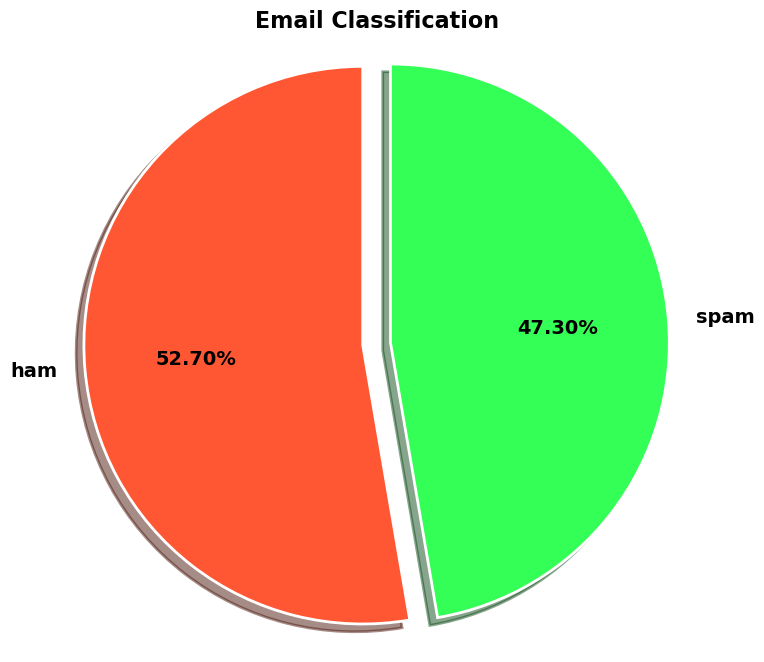

In [15]:
import matplotlib.pyplot as plt

colors = ['#FF5733', '#33FF57']

# Define the explode parameter to create a gap between slices
explode = (0, 0.1)  # Explode the second slice (spam) by 10%

# Create a figure with a white background
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_facecolor('white')

# Create the pie chart with custom colors, labels, explode parameter, and shadow
wedges, texts, autotexts = ax.pie(
    values, labels=['ham', 'spam'],
    autopct='%0.2f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
    explode=explode,  # Apply the explode parameter
    shadow=True  # Add shadow
)

# Customize text properties
for text, autotext in zip(texts, autotexts):
    text.set(size=14, weight='bold')
    autotext.set(size=14, weight='bold')

# Add a title
ax.set_title('Email Classification', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Show the pie chart
plt.show()

As seened from above image the dataset looks balance as Spam is 47.30% and ham is 52.70%

## 5.2 Text Length and Structure Analysis

In [16]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MoaviaHassan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
import nltk
print(nltk.data.path)
nltk.data.find('tokenizers/punkt')

['C:\\Users\\MoaviaHassan/nltk_data', 'c:\\Users\\MoaviaHassan\\miniconda3\\envs\\spam\\nltk_data', 'c:\\Users\\MoaviaHassan\\miniconda3\\envs\\spam\\share\\nltk_data', 'c:\\Users\\MoaviaHassan\\miniconda3\\envs\\spam\\lib\\nltk_data', 'C:\\Users\\MoaviaHassan\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


FileSystemPathPointer('C:\\Users\\MoaviaHassan\\AppData\\Roaming\\nltk_data\\tokenizers\\punkt')

In [18]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_sentence'] = df['text'].apply(lambda x: len(x.split('.')))

In [19]:
df['num_characters'] = df['text'].apply(len)


In [20]:
df.describe()

,target,num_words,num_sentence,num_characters
count,193850.000000,1.938500e+05,193850.000000,1.938500e+05
mean,0.473000,2.760373e+02,3.335517,1.812779e+03
std,0.499272,3.671773e+03,19.266957,2.659510e+04
min,0.000000,1.000000e+00,1.000000,1.000000e+00
25%,0.000000,5.500000e+01,1.000000,3.620000e+02
50%,0.000000,1.270000e+02,1.000000,8.000000e+02
75%,1.000000,2.800000e+02,1.000000,1.803000e+03
max,1.000000,1.585483e+06,2732.000000,1.151031e+07


## 5.3 Summary Statistics for Legitimate Messages

In [21]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,1.021590e+05,1.021590e+05,102159.000000
mean,2.169723e+03,3.345735e+02,3.505702
std,3.656265e+04,5.047058e+03,24.562245
min,1.000000e+00,1.000000e+00,1.000000
25%,4.170000e+02,6.500000e+01,1.000000
50%,9.500000e+02,1.490000e+02,1.000000
75%,1.968000e+03,3.110000e+02,1.000000
max,1.151031e+07,1.585483e+06,2732.000000


## 5.4 Summary Statistics for Spam Messages

In [22]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,91691.000000,91691.000000,91691.000000
mean,1415.085112,210.818314,3.145903
std,2367.969268,337.864413,10.609727
min,1.000000,1.000000,1.000000
25%,309.000000,47.000000,1.000000
50%,675.000000,106.000000,1.000000
75%,1570.000000,239.000000,1.000000
max,144087.000000,25393.000000,945.000000


## 5.5 Character Length Distribution for Legitimate and Spam Messages

In [23]:
# import seaborn as sns
# import matplotlib.pyplot as plt


# plt.figure(figsize=(10, 6))

# sns.histplot(df[df['target'] == 0]['num_characters'], color='blue', label='Target 0', kde=True)

# sns.histplot(df[df['target'] == 1]['num_characters'], color='red', label='Target 1', kde=True)

# plt.xlabel('Number of Characters', fontsize=14)
# plt.ylabel('Frequency', fontsize=14)
# plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

# plt.legend()

# sns.set(style='whitegrid')

# plt.show()

## 5.6  Pairplot for Data Visualization

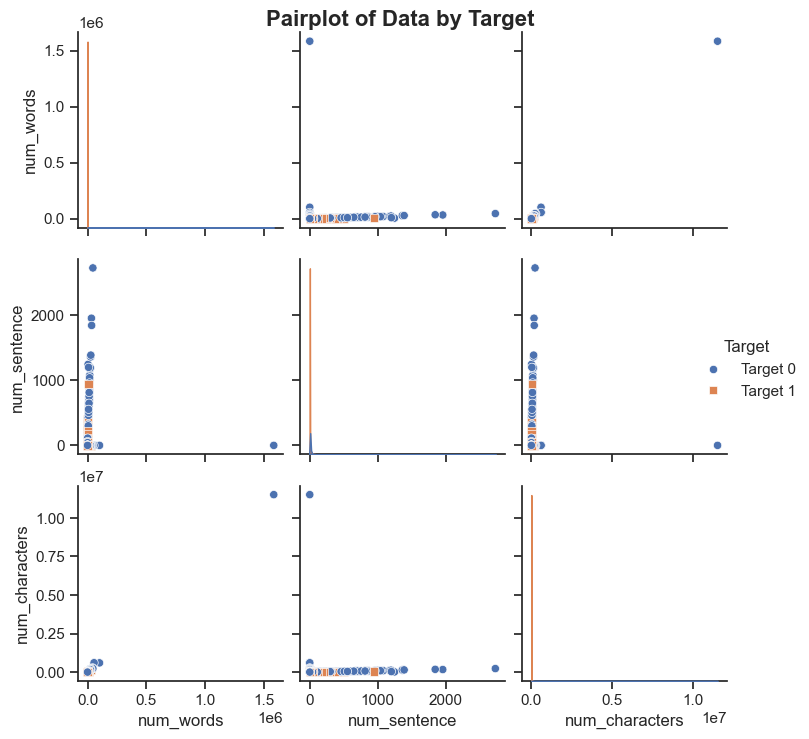

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with custom styling
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(df, hue='target', diag_kind='kde', markers=["o", "s"])

# Set a title for the pairplot
g.fig.suptitle("Pairplot of Data by Target", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.95)  # Adjust the position of the title

# Customize the legend
g._legend.set_title('Target')
for t, l in zip(g._legend.texts, ["Target 0", "Target 1"]):
    t.set_text(l)

# Show the pairplot
plt.show()

## 5.7 Coorelation

In [25]:
df[['target','num_characters', 'num_words', 'num_sentence']].corr()

,target,num_characters,num_words,num_sentence
target,1.000000,-0.014167,-0.016828,-0.009324
num_characters,-0.014167,1.000000,0.998815,0.053617
num_words,-0.016828,0.998815,1.000000,0.081433
num_sentence,-0.009324,0.053617,0.081433,1.000000


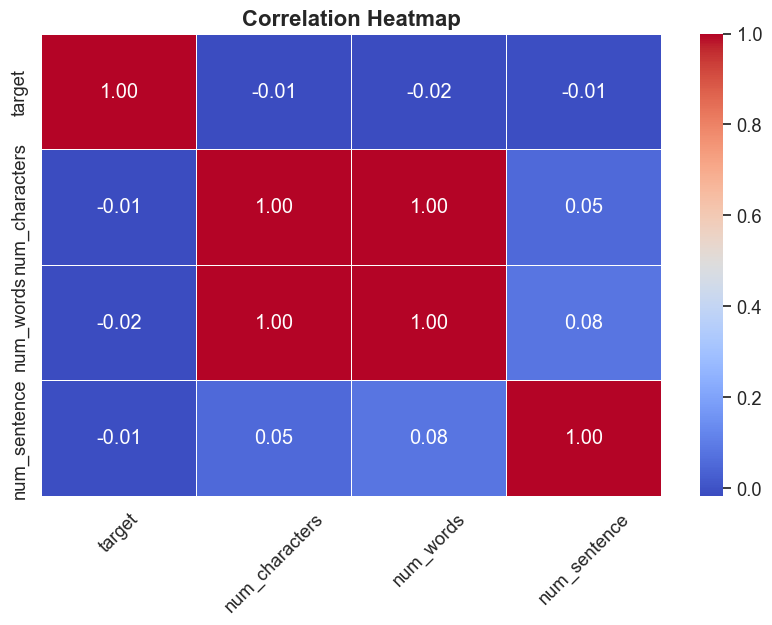

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix
correlation_matrix = df[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

#  **6 Data Preprocessing**

In [27]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
import nltk

# Precompute stopwords and initialize stemmer
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    tokens = nltk.word_tokenize(text)
    
    # Remove special characters, stopwords, and punctuation
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words and word not in string.punctuation]
    
    # Stemming using Porter Stemmer
    tokens = [ps.stem(word) for word in tokens]
    
    # Join the processed tokens back into a single string
    return " ".join(tokens)

In [28]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

## 6.1 Creating a New Column: 'transformed_text'

In [29]:
df['transformed_text'] = df['text'].apply(transform_text)

In [30]:
df.to_csv("../clean_dataset.csv")

In [31]:
df.sample(10)

,target,text,num_words,num_sentence,num_characters,transformed_text
44118,0,original message hayden frank sent thursday ja...,46,1,356,origin messag hayden frank sent thursday janua...
110125,0,dear mr lay thank you for you leadership durin...,154,1,786,dear mr lay thank leadership crisi demonstr st...
106903,1,get access to all the popular software possibl...,137,1,1143,get access popular softwar possibl less sell s...
2461,0,commercial risk reinsurance is very well known...,388,1,2469,commerci risk reinsur well known reput accord ...
146374,0,thank you tahir the mailing ip health does not...,755,1,4954,thank tahir mail ip health accept attach downl...
57965,0,author metze date escapenumber escapenumber es...,324,1,2335,author metz date escapenumb escapenumb escapen...
3120,0,what are your issues we are meeting with escap...,150,1,937,issu meet escapenumb tomorrow origin messag pe...
54808,0,original message received fri escapenumber oct...,346,1,3263,origin messag receiv fri escapenumb oct escape...
189684,0,original message courtney cleman enron sent th...,138,1,1094,origin messag courtney cleman enron sent thurs...
24089,0,escapenumber escapenumber duke story to be he...,335,1,2230,escapenumb escapenumb duke stori heavili featu...


## 6.2 Word Cloud for Spam Messages

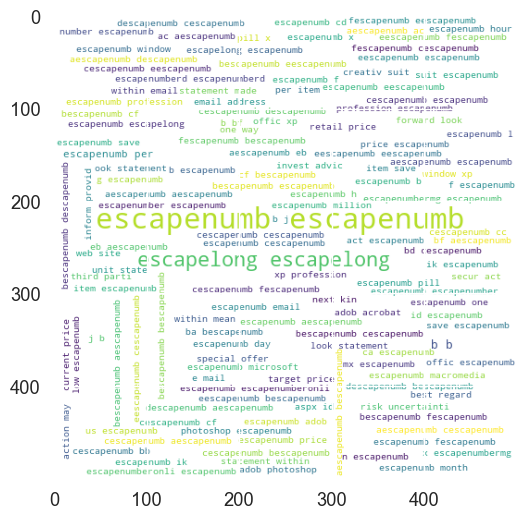

In [32]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

## 6.2 Word Cloud for Ham Messages

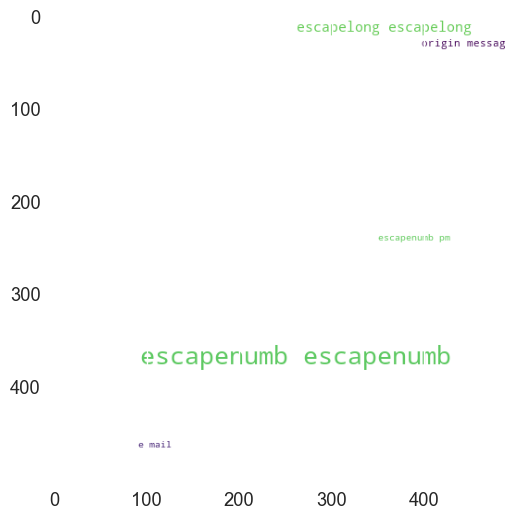

In [33]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

## 6.3 Find top 30 words of spam

In [34]:
spam_carpos = []
for sentence in df[df['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [35]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\MoaviaHassan\AppData\Local\Temp\ipykernel_4212\2512895475.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')


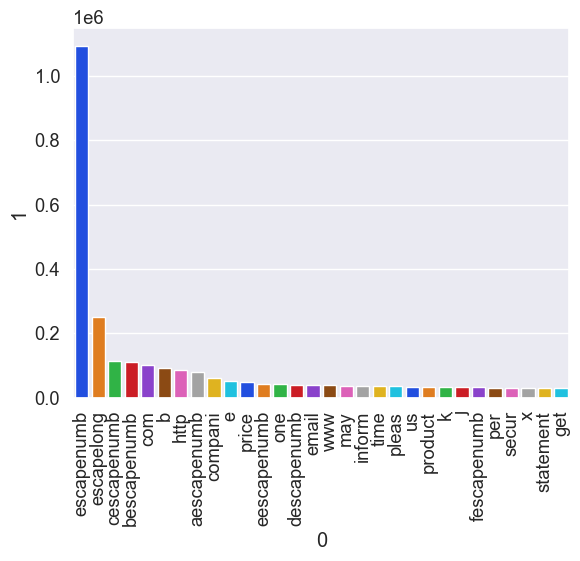

In [36]:
sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

## 6.4 Find top 30 words of Not spam Messages

In [37]:
ham_carpos = []
for sentence in df[df['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [38]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\MoaviaHassan\AppData\Local\Temp\ipykernel_4212\699915630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')


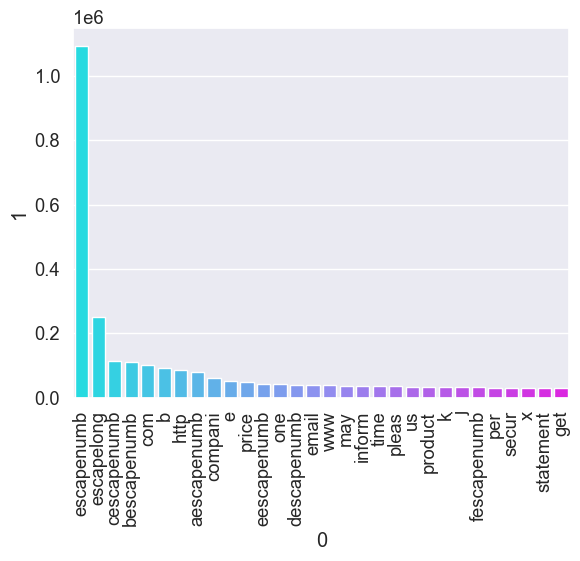

In [39]:
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

#  **7 Model Building**

## 7.1 Initializing CountVectorizer and TfidfVectorizer

In [40]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

## 7.2 Dependent and Independent Variable

In [41]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

## 7.3 Split into Train and Test Data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

## 7.4 Import the Models

# **1 Logistic Regression**

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')

In [45]:
from sklearn.metrics import accuracy_score, precision_score

In [46]:
lrc.fit(X_train,y_train)
y_pred = lrc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(accuracy)
print(precision)

0.9700541655919526
0.9618985766087569


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get predicted probabilities
y_pred_prob = lrc.predict_proba(X_test)[:, 1]

# Calculate R-squared, MAE, and RMSE
r2 = r2_score(y_test, y_pred_prob)
mae = mean_absolute_error(y_test, y_pred_prob)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_prob))

print("R-squared:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R-squared: 0.9059312420955595
MAE: 0.05399712608250575
RMSE: 0.15308070643822286


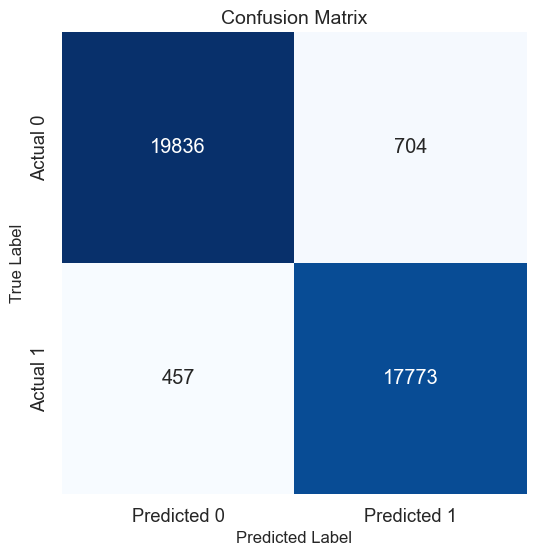

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

2. ROC Curve
The ROC curve shows the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR).

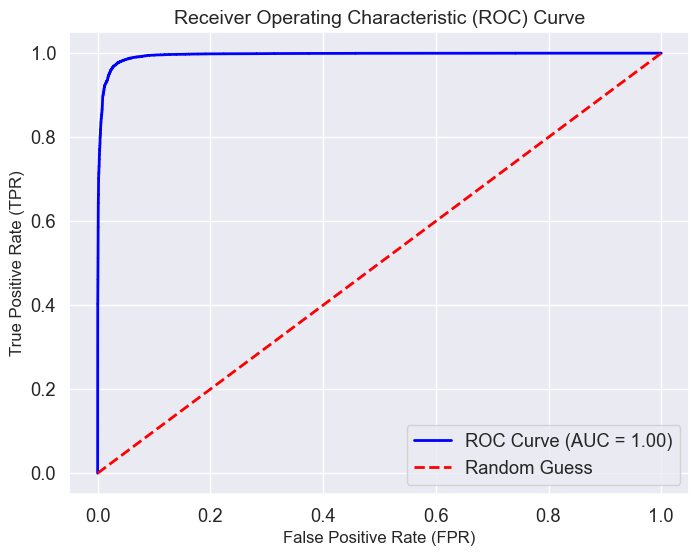

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

3. Precision-Recall Curve
The Precision-Recall curve is useful for imbalanced datasets.

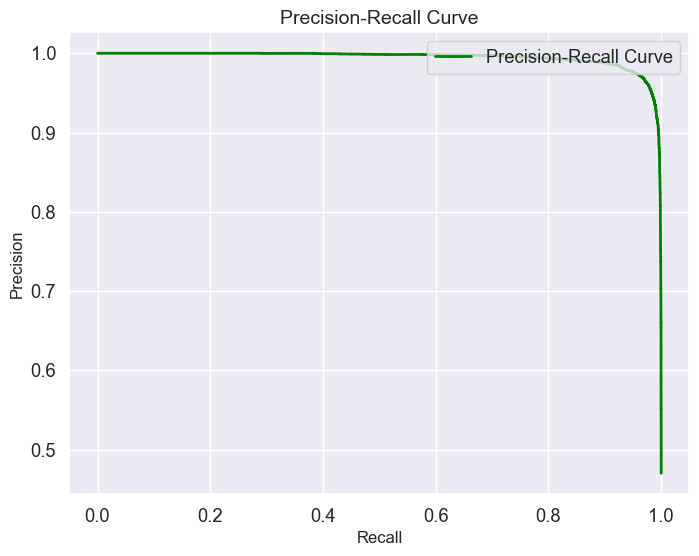

In [50]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="green", lw=2, label="Precision-Recall Curve")
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curve", fontsize=14)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

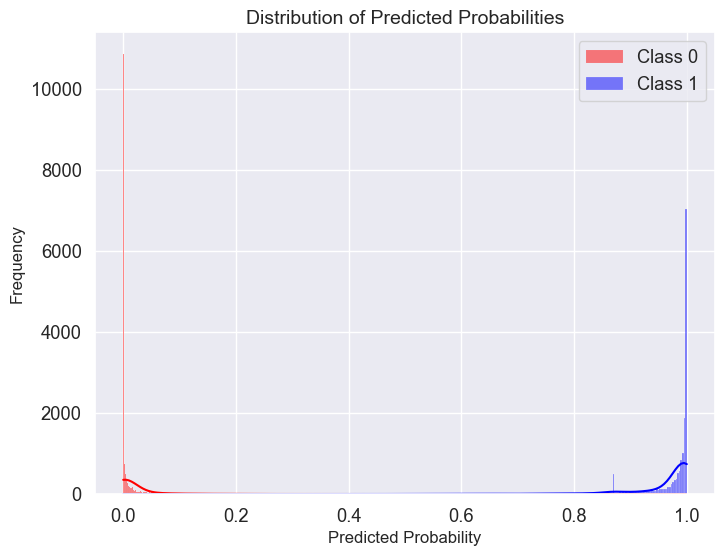

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_prob[y_test == 0], color="red", kde=True, label="Class 0", alpha=0.5)
sns.histplot(y_pred_prob[y_test == 1], color="blue", kde=True, label="Class 1", alpha=0.5)
plt.xlabel("Predicted Probability", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Predicted Probabilities", fontsize=14)
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [52]:
from sklearn.metrics import f1_score, recall_score

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)

print("F1-score:", f1)
print("Recall:", recall)
print("Specificity:", specificity)

F1-score: 0.9683711553654616
Recall: 0.9749314317059792
Specificity: 0.9657254138266796


## Saving graphs to Logistic Regression Model

In [53]:
import os

# Define the folder name
folder_name = "Logistic Regression"

# Create the folder if it doesn't exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

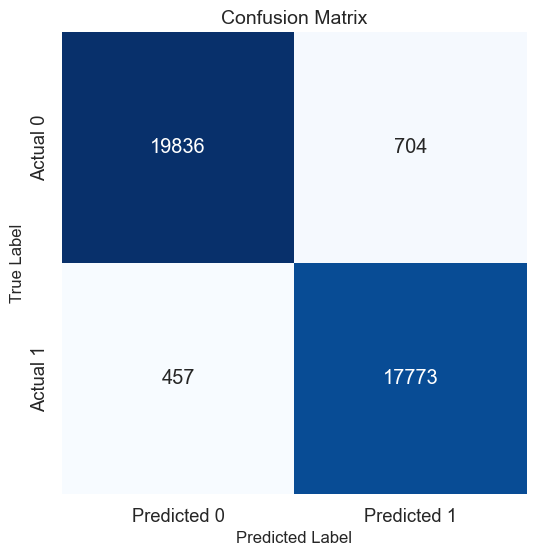

In [54]:
# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Save the graph
plt.savefig(os.path.join(folder_name, "Logistic_Regression_Confusion_Matrix.png"), dpi=300, bbox_inches="tight")
plt.show()

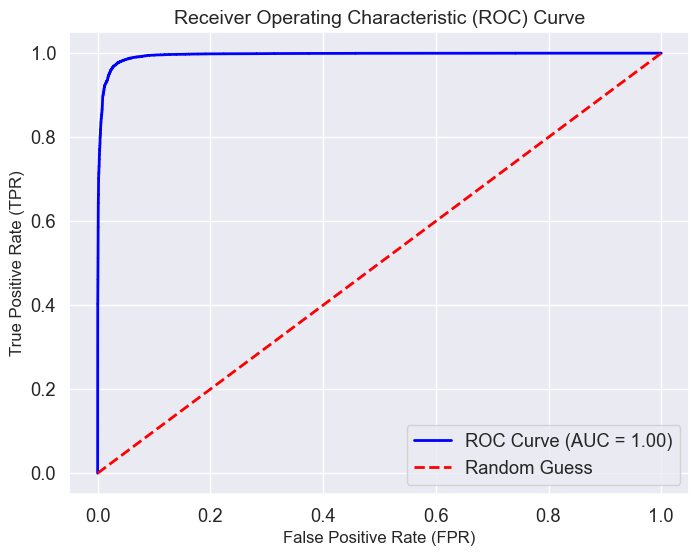

In [55]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)

# Save the graph
plt.savefig(os.path.join(folder_name, "Logistic_Regression_ROC_Curve.png"), dpi=300, bbox_inches="tight")
plt.show()

# **2 SVC** 

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVC model with linear kernel
svc = SVC(kernel='linear', probability=True, random_state=42)
svc.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svc.predict(X_test_scaled)
y_pred_prob = svc.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("ROC-AUC:", auc_score)

# Create folder for SVC
folder_name = "SVC"
os.makedirs(folder_name, exist_ok=True)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig(os.path.join(folder_name, "SVC_Confusion_Matrix.png"), dpi=300, bbox_inches="tight")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", lw=2, label="Random Guess")
plt.xlabel("False Positive Rate (FPR)", fontsize=12)
plt.ylabel("True Positive Rate (TPR)", fontsize=12)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig(os.path.join(folder_name, "SVC_ROC_Curve.png"), dpi=300, bbox_inches="tight")
plt.show()